Global Power Plant Database Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data =  pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
data.shape

(907, 27)

In [6]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
data['country'].value_counts()

IND    907
Name: country, dtype: int64

In [8]:
data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [9]:
data.drop(columns=["country","country_long"],axis=1,inplace=True)

In [10]:
data.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)

In [11]:
data['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

In [12]:
data.drop("name",axis=1,inplace=True)

In [13]:
data["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

In [14]:
data.drop("gppd_idnr",axis=1,inplace=True)

In [15]:
data["owner"].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [16]:
data.drop("owner",axis=1,inplace=True)

In [17]:
data.drop("url",axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2013  0 non-null      float64
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
 14  generation_gwh_2019  0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 

In [19]:
data.drop(columns=["generation_gwh_2013","generation_gwh_2019"],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


# Managing null values

In [21]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [22]:
data.shape

(907, 13)

In [23]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
data.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [25]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [26]:
data['plant_age'] = 2019 - data['commissioning_year']
data.drop(columns=['commissioning_year'],inplace=True)
# using 2019 as the information in the dataset was available till the year 2019, but the column was dropped for reasons specified earlier 

In [27]:
data.head(19)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.50,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,8.0
1,98.00,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.20,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.00,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.00,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
5,250.00,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
6,60.00,10.4547,77.0078,Hydro,NaN,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150,49.0
7,192.00,32.2258,77.2070,Hydro,NaN,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,290.00,16.3300,75.8863,Hydro,NaN,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0
9,210.00,23.1642,81.6373,Coal,Oil,Central Electricity Authority,WRI,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,11.0


In [28]:
data.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
count,907.000000,861.000000,861.000000,398.000000,422.000000,434.000000,440.000000,448.000000,527.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.908918
std,590.085456,6.239612,4.939316,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,17.082868
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,16.773900,74.256200,223.557672,176.381063,188.285252,177.874930,193.378250,7.000000
50%,59.200000,21.780000,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.512400,79.440800,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,31.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


# Primary Findings

no more null values in the dataset

there is presence of lot of outliers, with skewness across columns

In [29]:
categorical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [30]:
numerical_col = []
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']


In [31]:
#DATA Visualization

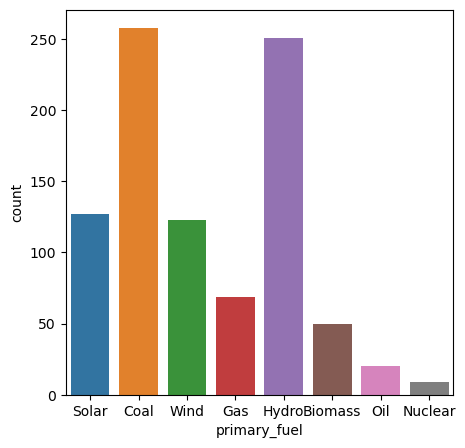

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(data['primary_fuel'])
plt.show()

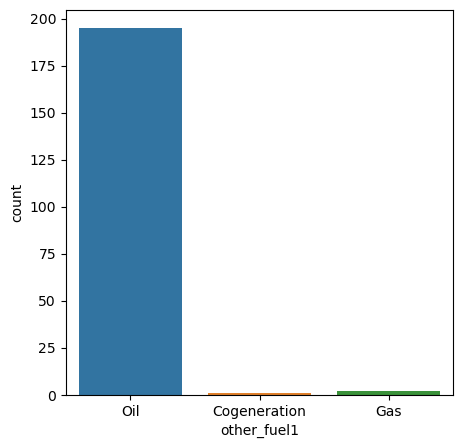

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(data['other_fuel1'])
plt.show()

In [35]:
print(data["other_fuel1"].value_counts())

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


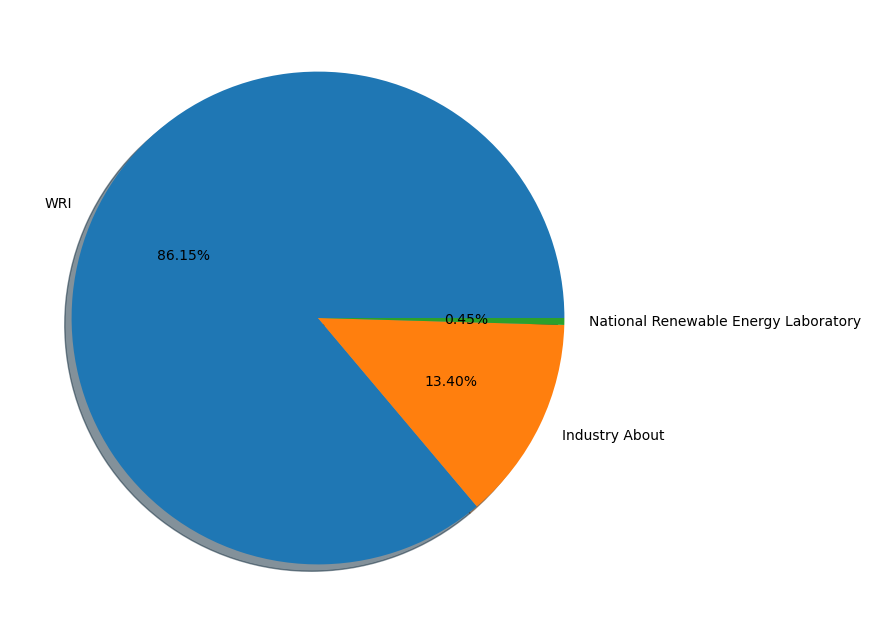

In [36]:
print(data["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

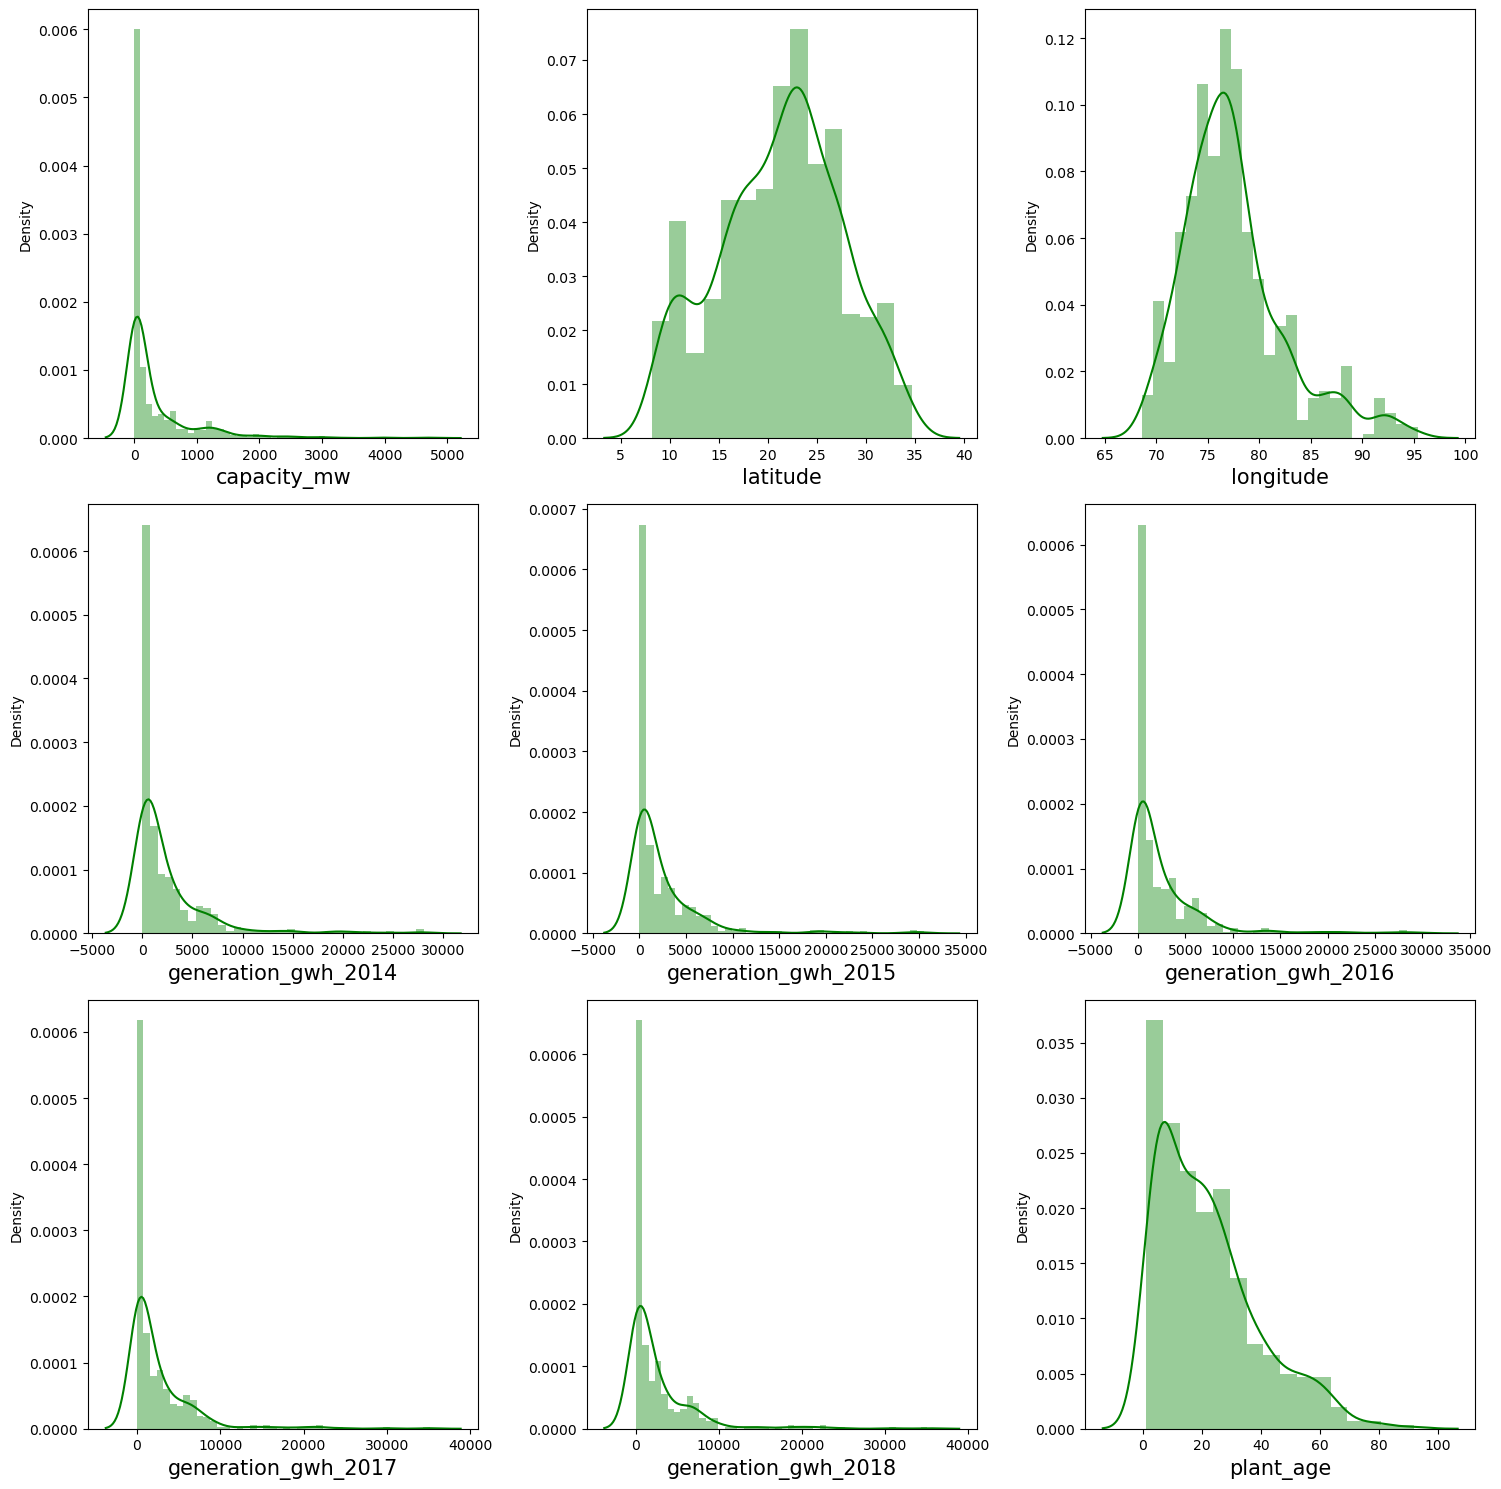

In [37]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col],color='g')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

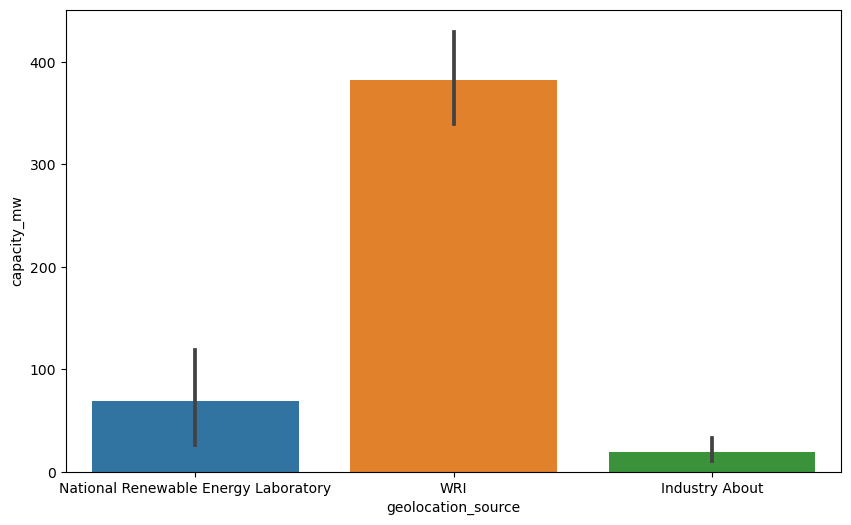

In [39]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = data)
plt.show()

<AxesSubplot:title={'center':'Comparision between plant_age and capacity_mw'}, xlabel='plant_age', ylabel='capacity_mw'>

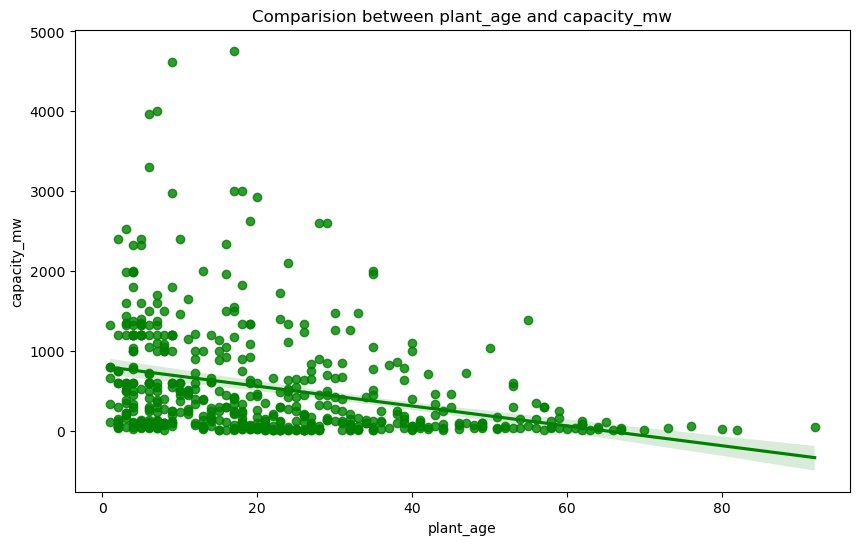

In [40]:
plt.figure(figsize=[10,6])
plt.title('Comparision between plant_age and capacity_mw')
sns.regplot(data['plant_age'],data['capacity_mw'],color = "g")

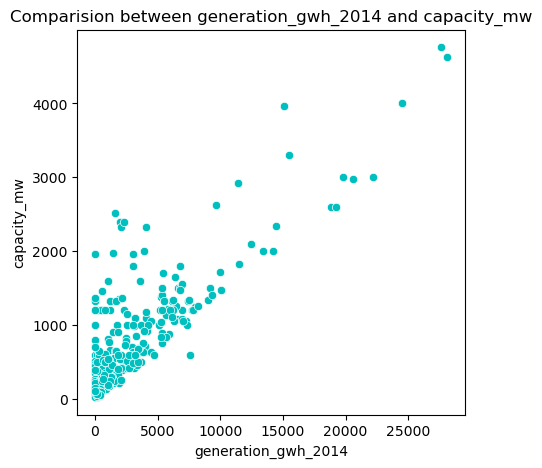

In [41]:
plt.figure(figsize = (5,5))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = data,color="c")
plt.show()

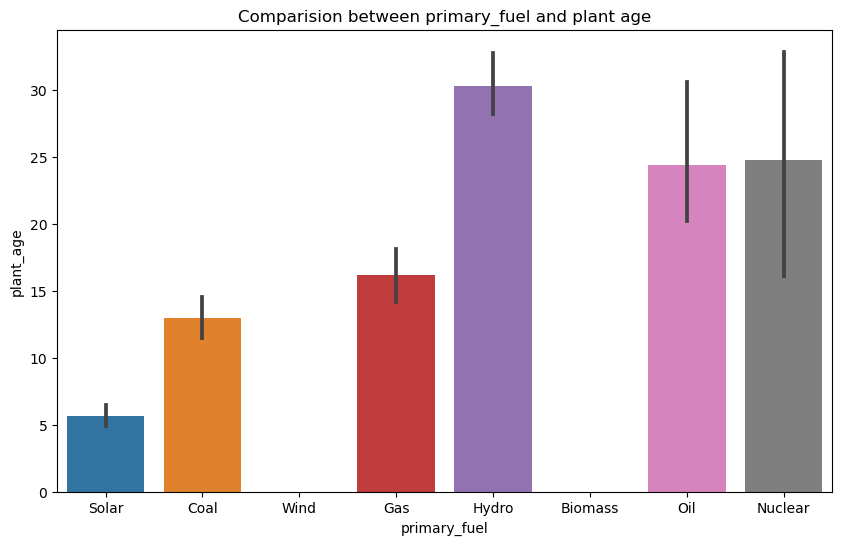

In [42]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and plant age")
sns.barplot(x = "primary_fuel", y = "plant_age", data = data)
plt.show()

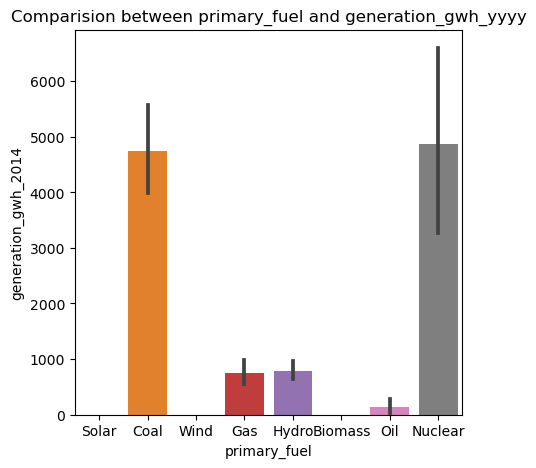

In [43]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = data)
plt.show()

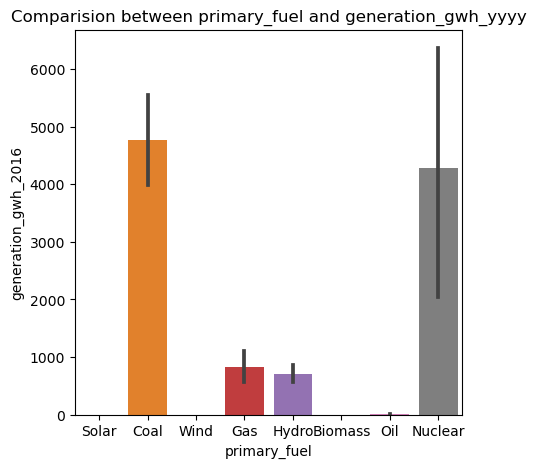

In [44]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = data)
plt.show()

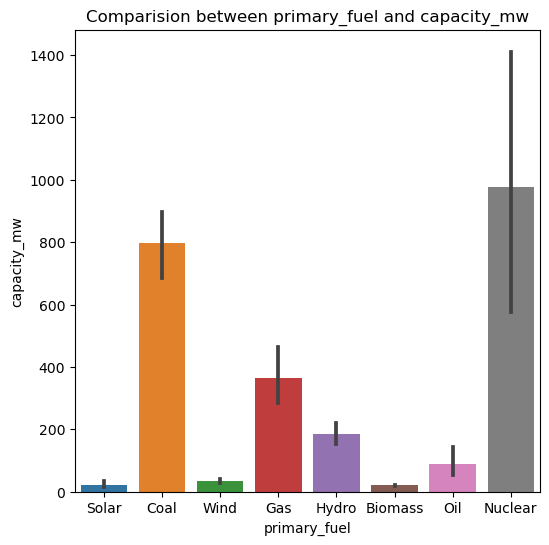

In [45]:
plt.figure(figsize = (6,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)
plt.show()

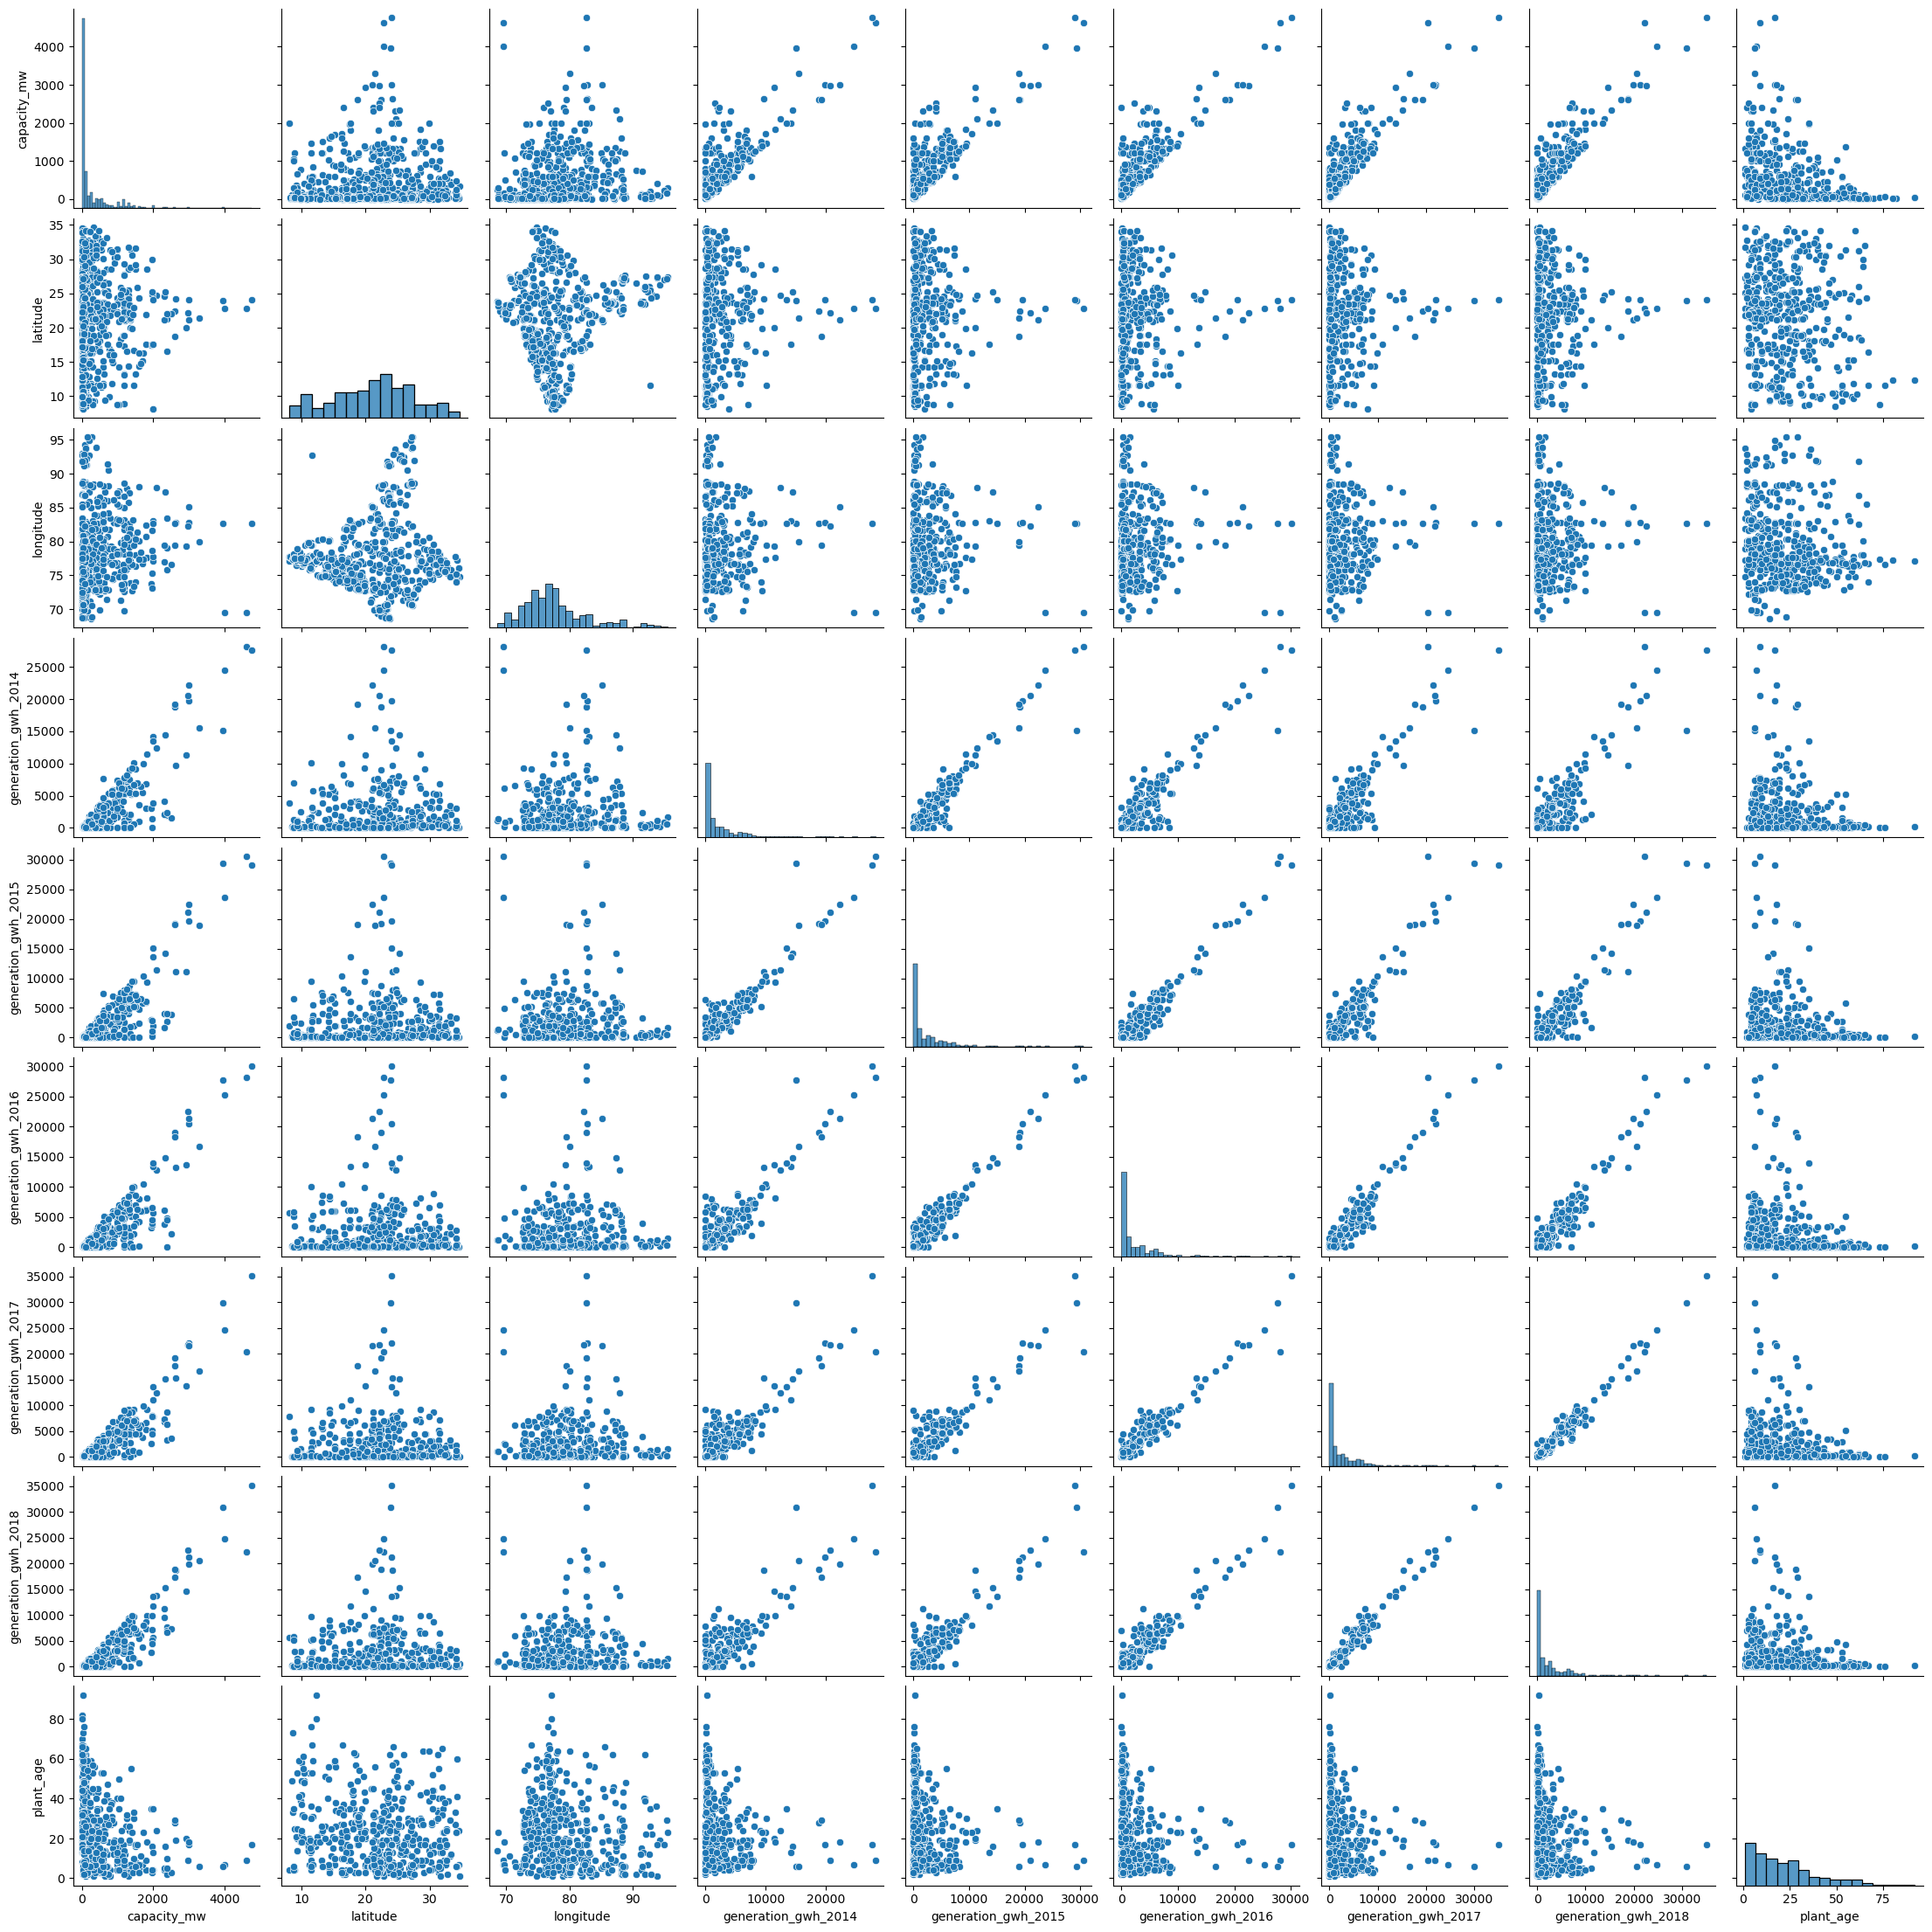

In [46]:
sns.pairplot(data)